Import required libraries

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.titlesize'] = 20
%matplotlib inline
matplotlib.rcParams['image.cmap'] = 'gray'

Increase brightness and contrast

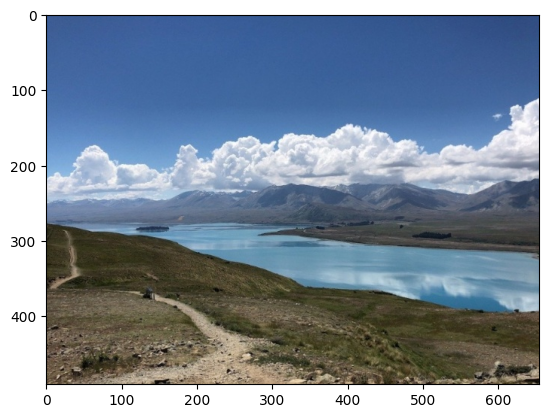

In [32]:
img = cv2.imread("increase_brightness.jpg")
plt.imshow(img[...,::-1]);

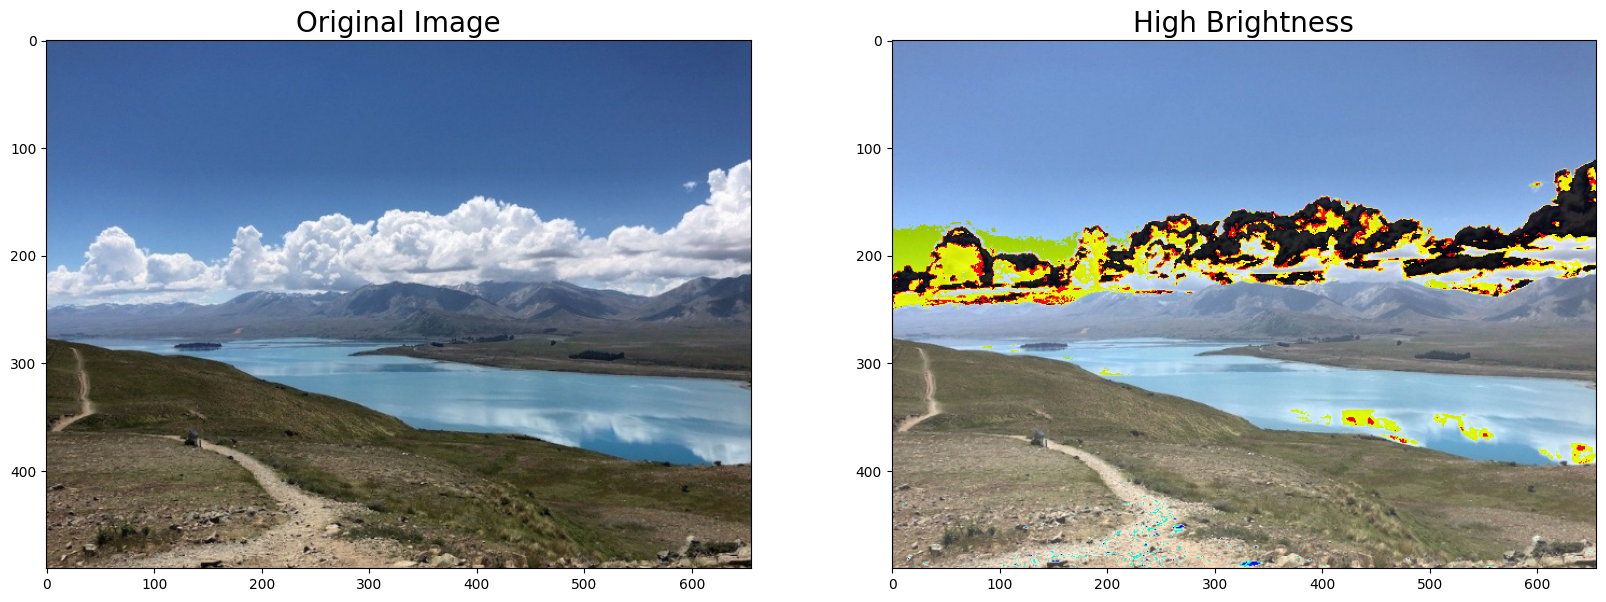

In [33]:
brightnessOffset = 50
brightHigh = img + brightnessOffset
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

In [34]:
# Sample 2x2 matrix of type uint8
a = np.array([[100, 110],
              [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


In [35]:
# Add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


In [36]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


In [37]:
a_int32 = np.int32(a)
b = a_int32+130
print(b)

[[230 240]
 [250 260]]


In [38]:
b=b.clip(0,255)
b_uint8 = np.uint8(b)
b_uint8

array([[230, 240],
       [250, 255]], dtype=uint8)

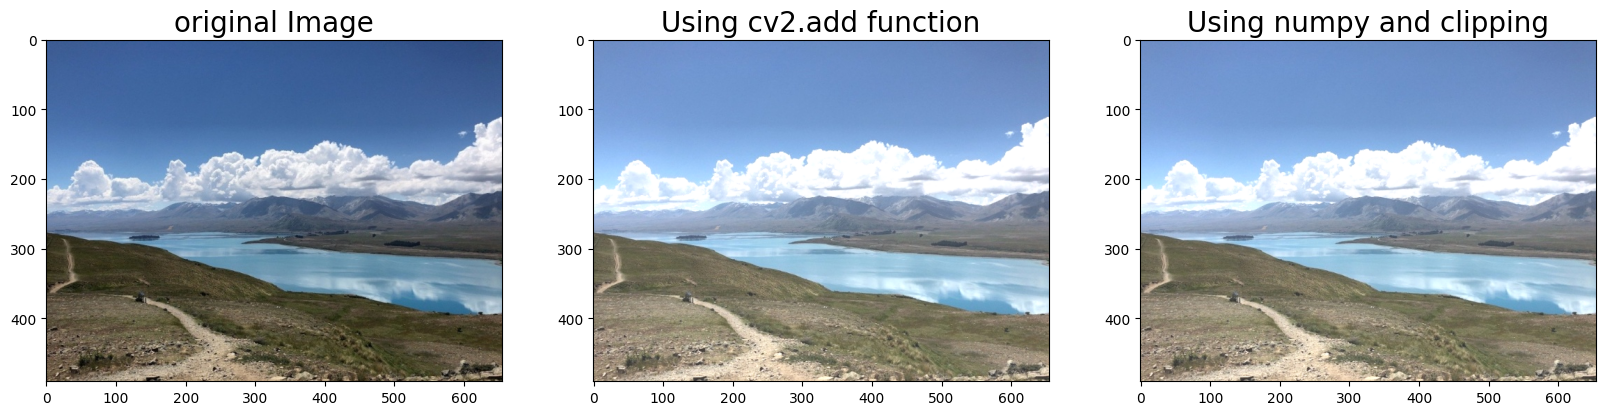

In [39]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(img, np.ones(img.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(img) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping");

Apply histogram equalization

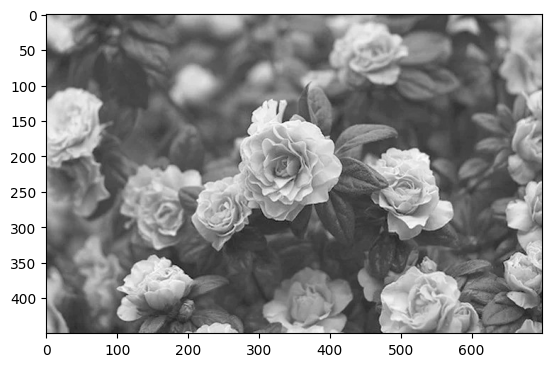

In [40]:
img = cv2.imread("hist_equalization.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img);

(-0.5, 699.5, 449.5, -0.5)

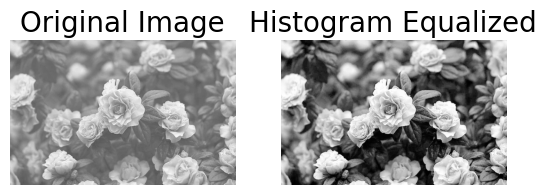

In [41]:
imEq = cv2.equalizeHist(img)
#Display images
plt.figure()
ax = plt.subplot(1,2,1)
plt.imshow(img, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')
ax = plt.subplot(1,2,2)
plt.imshow(imEq, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

Apply histogram equalization and Contrast Limited Adaptive Histogram Equalization (CLAHE) and compare results

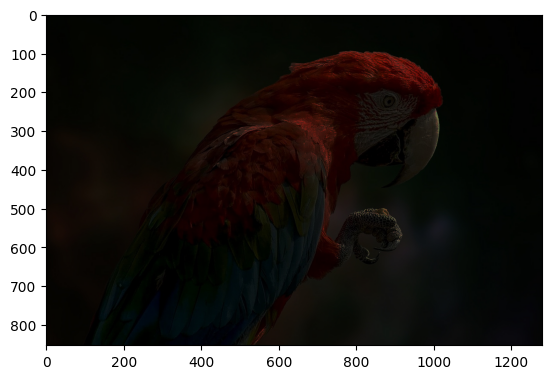

In [42]:
img = cv2.imread("histogram _equalized.jpg", cv2.IMREAD_COLOR)
plt.imshow(img[...,::-1]);

(-0.5, 1279.5, 852.5, -0.5)

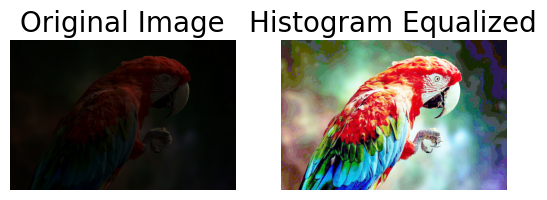

In [43]:
imEq = np.zeros_like(img)

# Peform histogram equalization on each channel separately
for i in range(0,3):
    imEq[:,:,i] = cv2.equalizeHist(img[:,:,i])

plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

(-0.5, 1279.5, 852.5, -0.5)

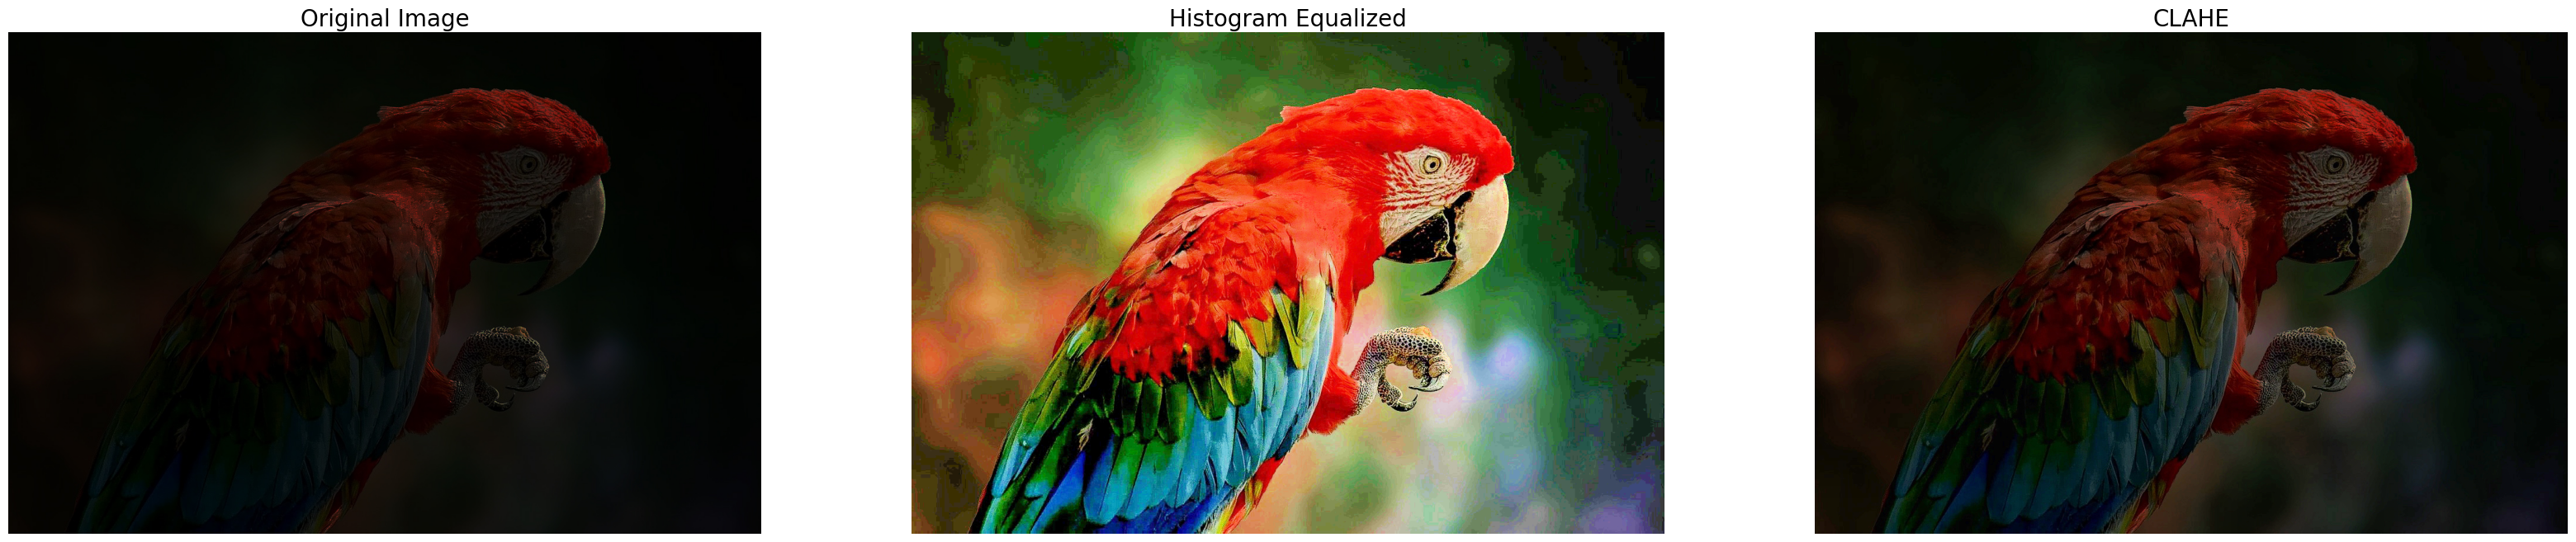

In [44]:
# Convert to HSV
imhsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)

#Display images
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(img[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

Apply gaussian filter with different kernel size and compare

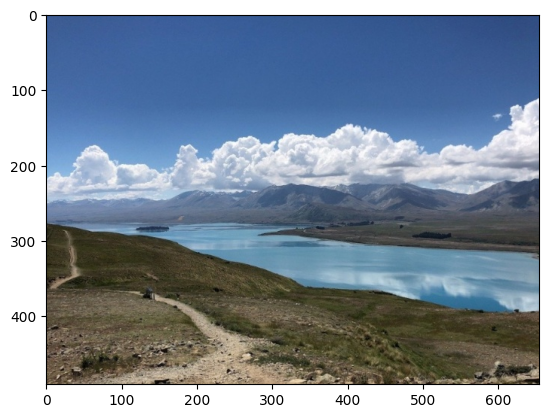

In [76]:
img = cv2.imread("increase_brightness.jpg")
plt.imshow(img[...,::-1]);


Text(0.5, 1.0, 'Gaussian Blur Result 2 : KernelSize = 25')

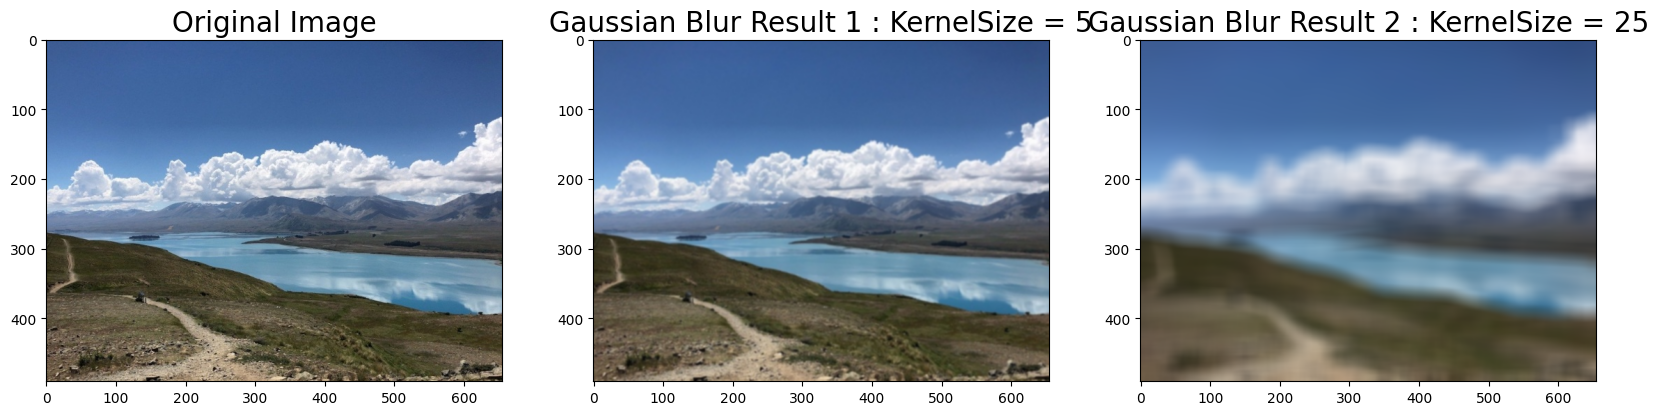

In [77]:
# Apply gaussian blur
dst1=cv2.GaussianBlur(img,(5,5),0,0)
dst2=cv2.GaussianBlur(img,(25,25),50,50)
# Display images
combined = np.hstack((img, dst1,dst2))
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Gaussian Blur Result 1 : KernelSize = 5")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Gaussian Blur Result 2 : KernelSize = 25")

Apply median filter

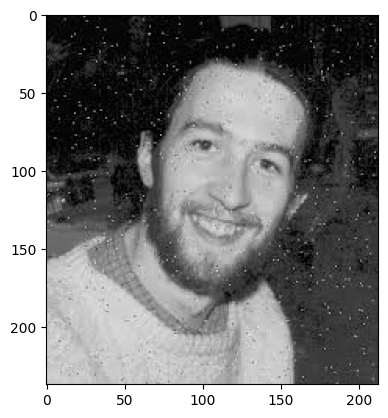

In [60]:
img = cv2.imread("/content/images (8).jpeg")
plt.imshow(img);

Text(0.5, 1.0, 'Median Blur Result : KernelSize = 5')

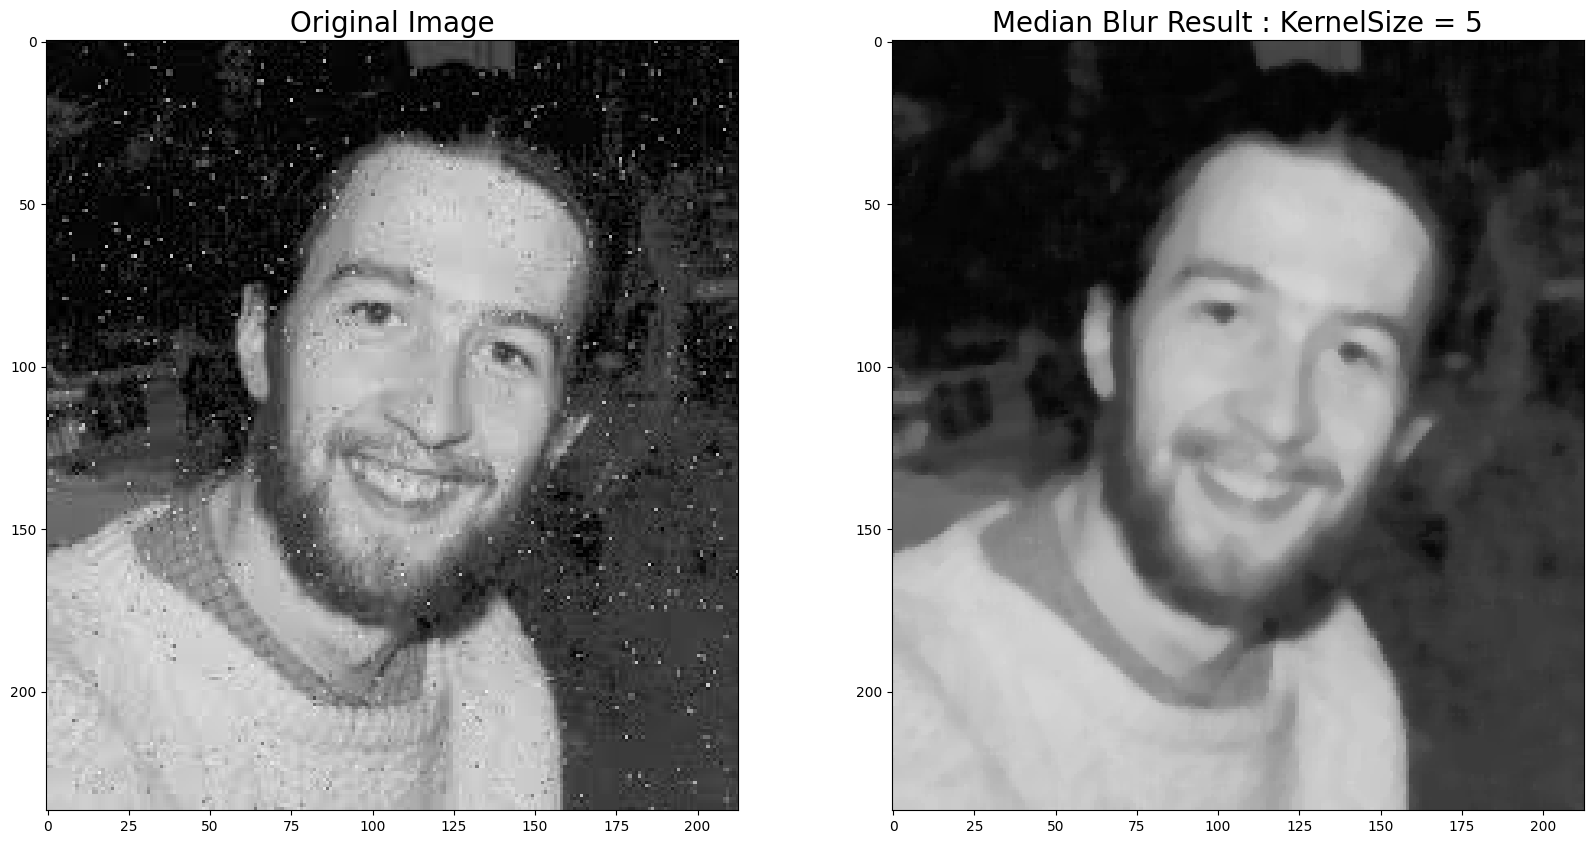

In [61]:
# Defining the kernel size
kernelSize = 5
# Performing Median Blurring
medianBlurred = cv2.medianBlur(img,kernelSize)

# Display the original and median blurred image
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Blur Result : KernelSize = 5")

Apply sharpening filter

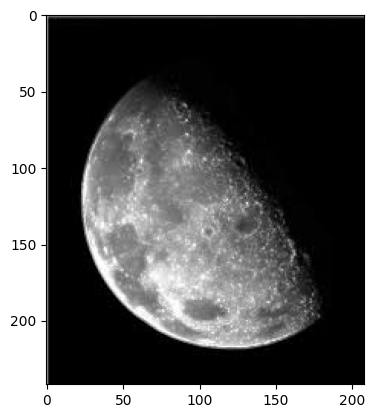

In [73]:
img = cv2.imread("sharp_filter.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img);

Text(0.5, 1.0, 'Sharpening Result')

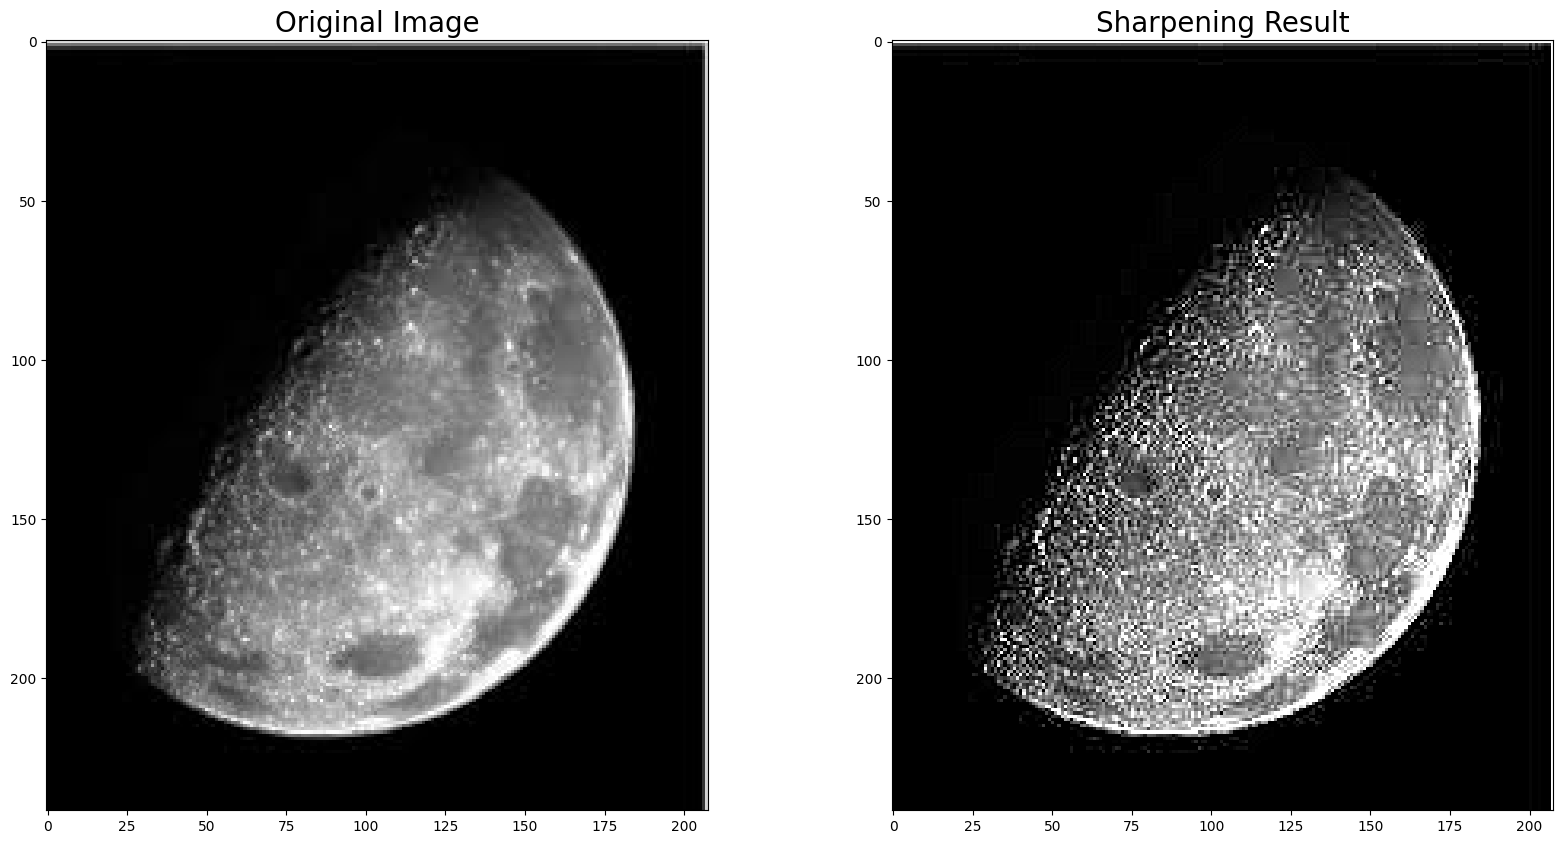

In [74]:
#Sharpen kernel
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")
# Using 2D filter by applying the sharpening kernel
sharpenOutput = cv2.filter2D(img, -1, sharpen)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpenOutput[...,::-1]);plt.title("Sharpening Result")

Apply Adaptive thresholding and global thresholding and compare with results

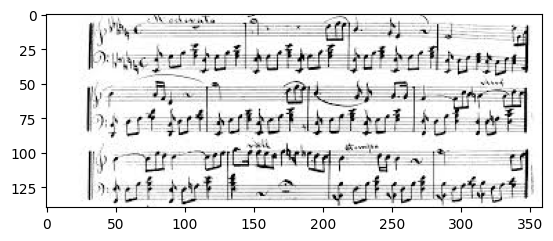

In [62]:
img = cv2.imread("Threshold.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img);

Text(0.5, 1.0, 'Thresholded (adaptive)')

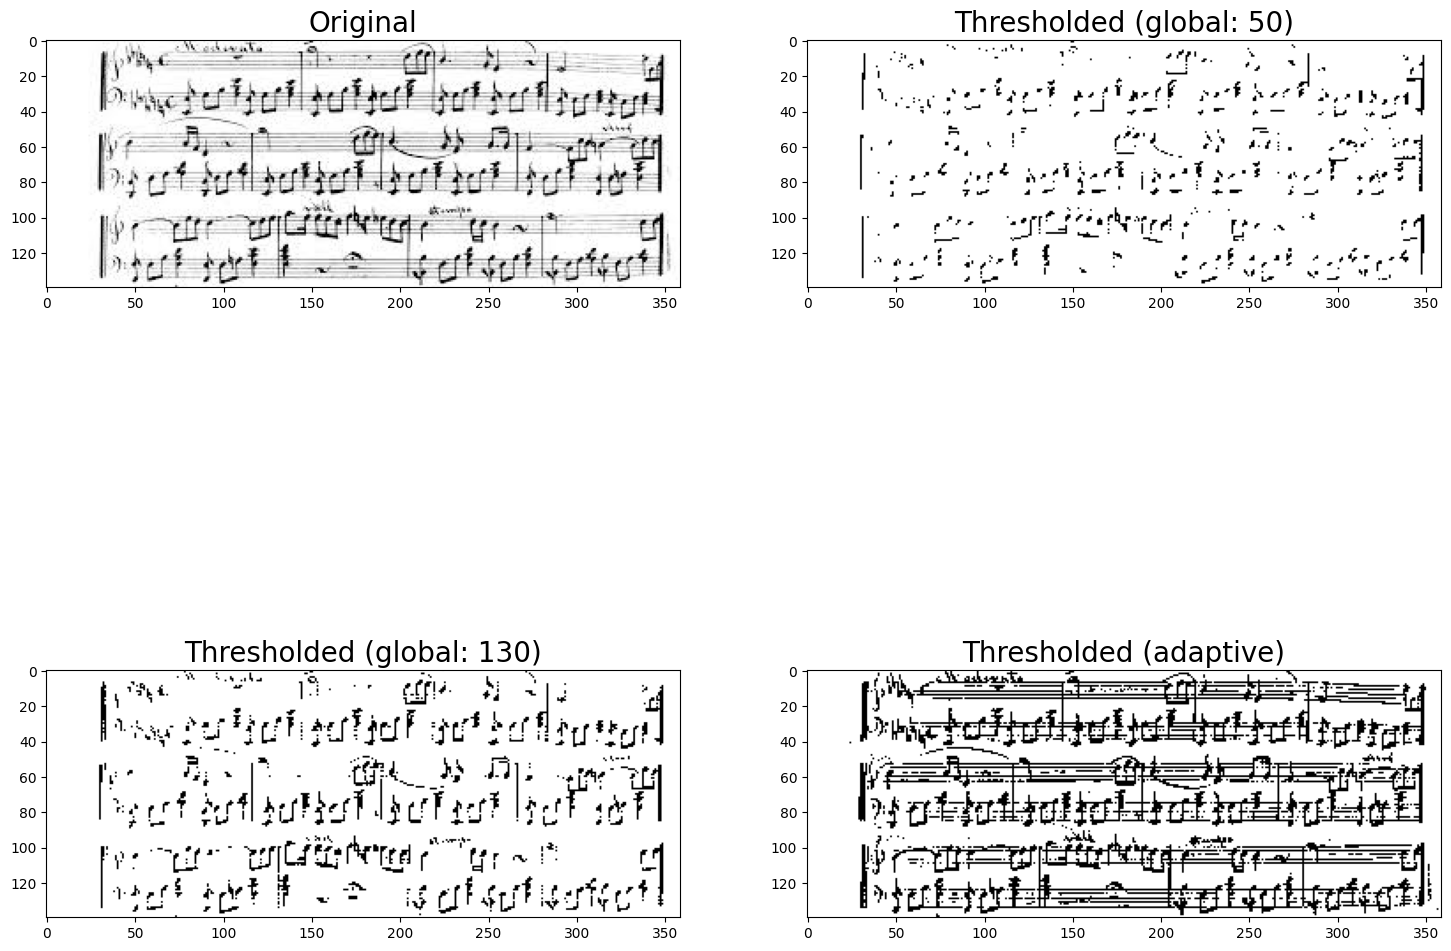

In [63]:
# Perform global thresholding.
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Thresholded (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Thresholded (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Thresholded (adaptive)')

In [64]:
thresh = 100
maxValue = 255

In [67]:
th, dst_bin = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

In [70]:
th, dst_bin_inv = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV)

Threshold Value = 100, Max Value = 255


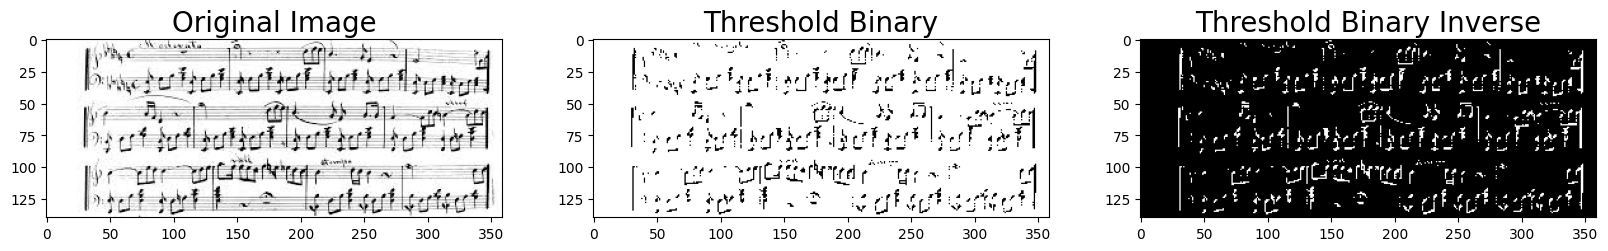

In [71]:
print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(131);plt.imshow(img, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(132);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(133);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");